# EDA - Factors that affect student math success in school

We have dataset with studets' scors in math exam and a number a factors in their personal and school live that can affect these scors. 

Our goal is to perform Explanatory Data Analysis (EDA) of this dataset.

In [808]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [809]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

stud_math = pd.read_csv('stud_math.csv')

In [810]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Column description

1 school — student's school's name abbreviation 

2 sex — student's sex ('F' - female, 'M' - male)

3 age — student's age (from 15 to 22)

4 address — student's type of address ('U' - urban, 'R' - rural)

5 famsize — student's family size ('LE3' <= 3, 'GT3' > 3)

6 Pstatus — parents' living together or apart ('T' - together, 'A' - apart)

7 Medu — mother's level of education (0 - none, 1 - 4 grades, 2 - 5-9 grades, 3 - middle special or 11 grades, 4 - higher)

8 Fedu — father's level of education (0 - none, 1 - 4 grades, 2 - 5-9 grades, 3 - middle special or 11 grades, 4 - higher)

9 Mjob — mother's job ('teacher', 'health', 'services' - public services, 'at_home' - not working, 'other')

10 Fjob — father's job ('teacher', 'health', 'services' - public services, 'at_home' - not working, 'other')

11 reason — reason for choosing the school ('home' - close to home, 'reputation' - school's reputation, 'course' - educational program, 'other' - other reason)

12 guardian — student's guardian ('mother', 'father', 'other')

13 traveltime — time spent travelling to school (1 - <15 min, 2 - 15-30 min, 3 - 30-60 min, 4 - >60 min)

14 studytime — time spent studying outside school, during the week (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours)

15 failures — number of failures in extracurricular activities (n, if 1<=n<=3, otherwise 0)

16 schoolsup — additional school support (yes / no)

17 famsup — additional family support (yes / no)

18 paid — additional paid math courses (yes / no)

19 activities — extracurricular activities (yes / no)

20 nursery — attended nursery (yes / no)

21 higher — wants to have higher education (yes / no)

22 internet — has internet at home (yes / no)

23 romantic — in a romantic relationship (yes / no)

24 famrel — family relationships (from 1 - very bad, to 5 - very good)

25 freetime — free time after school (from 1 - very  до 5 - очень мого)

26 goout — проведение времени с друзьями (from 1 - nearly no, to 5 - a lot of)

27 health — health (from 1 - very bad, to 5 - very good)

28 absences — number of classes missed

29 score — math exam scores

## Basic Metrics Analysis

We have data on 395 students:

In [811]:
stud_math.shape

(395, 30)

Most columns have missing values:

In [812]:
stud_math.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Using correlation function we can see that correlation between columns 'studytime, granular' and 'studytime' is -1, meaning we can drop one of them:

In [813]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [814]:
# We will drop 'studytime, granular' since it has negative values
# and it was not defined initially
stud_math.drop(['studytime, granular'], axis=1, inplace=True)

## Correcting Errors

Some columns have errors which we will try to correct.

#### 1) Father's level of education

In [815]:
# Fedu column should have values from 0 to 4, while there is one cell with 40.
stud_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [816]:
# Most likely it was meant as 4, hence we will replace the former
# with the latter.
stud_math.Fedu = stud_math.Fedu.replace(40, 4)

#### 2) Family relationships 

In [817]:
# famrel column should have values from 1 to 5, while there is one cell
# with -1.
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [818]:
# Most likely it was meant as 1, hence we will replace the former
# with the latter.
stud_math.famrel = stud_math.famrel.replace(-1, 1)

### Numeric Variables

There are 4 numeric variables in current dataset: age, failures, absences, score.

#### 1) Age

There seems to be no errors in the column, all values are within the given range (15-22). Distribution is positively-skewed, with its single peak at 16, which is usual age for a student to take exams. There are no missing values. Corrections to this colums are not required.

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

<AxesSubplot:>

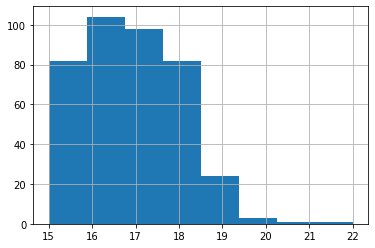

In [819]:
display(stud_math.age.unique())
stud_math.age.hist(bins=8)

#### 2) Failures

There seems to be no errors in the column, all values are within the given range (0-3). Distribution is positively-skewed, with its single peak at 0, which is expected. 

There are missing values which we will try to fill in.

array([ 0.,  3., nan,  2.,  1.])

<AxesSubplot:>

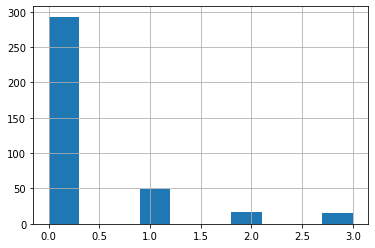

In [820]:
display(stud_math.failures.unique())
stud_math.failures.hist()

Those who do not have extracurricular activities should have not failures in them. Hence we could replace missing values in failures column with 0 for those who do not have 'no' in activities column. However, if we check mean failure, it is close to 0, and median failure is 0. Thus we will fill in all NaN cells in failures with 0.

In [821]:
display(stud_math.failures.mean())
display(stud_math.failures.median())

0.3378016085790885

0.0

In [822]:
stud_math['failures'].fillna(0, inplace=True)

#### 3) Absences

The distribution is not normal; maximum value is 385 while median is 7. There are outliers which need to be removed.

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

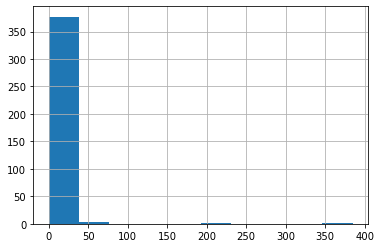

In [823]:
stud_math.absences.hist()
stud_math.absences.describe()

25th percentile: 0.0, 75th percentile: 8.0, IQR: 8.0,  Non-outlier range: [-12.0, 20.0].


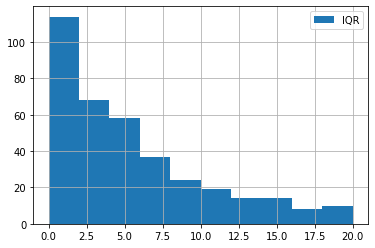

In [824]:
# We will use Interquartile range to find and remove outliers
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25th percentile: {},'.format(perc25), '75th percentile: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Non-outlier range: [{f}, {l}].".format(
          f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud_math.absences.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 20), label='IQR')

plt.legend()

In [825]:
# Since we cannot have negative number of absences, the lower bound will be 0
stud_math = stud_math.loc[stud_math.absences.between(0, perc75 + 1.5*IQR)]

#### 4) Score

Without peak at 0 we would have normal distribution with one peak approx. in the middle of the histogram. However we will not regard zero results as outliers, since they can interpreted in the way that some students do not take math exam at all, which is also an important observation. There are six missing values in the column which we will fill in with median value (since there are outliers).

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
Number of NaN cells is 5
Mean score is 51.99445983379501
Median score is 55.0


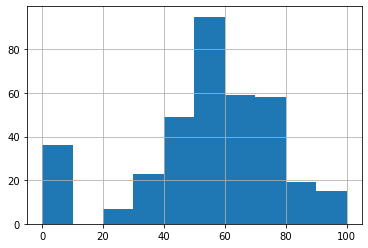

In [826]:
stud_math.score.hist()
print(stud_math.score.describe())
print('Number of NaN cells is', stud_math.score.isnull().sum())
print('Mean score is', stud_math.score.mean())
print('Median score is', stud_math.score.median())

In [827]:
stud_math['score'].fillna(stud_math['score'].median(), inplace=True)

Almost 10% of students have score 0, which can also be interpreted as that many students do not take math exam.

In [828]:
print('Ratio of students with exam result 0 is', round(
    len(stud_math.loc[stud_math.score == 0])*100 / len(stud_math), 2), '%')

Ratio of students with exam result 0 is 9.84 %


### Correlation of numeric variables

Age and number of failures in extracurricular activities have negative correlation with exam scores, which is expected. Peculiar observation is that the more number of classes a student missed, the higher their math score. However the correlation between these two variables is weak.

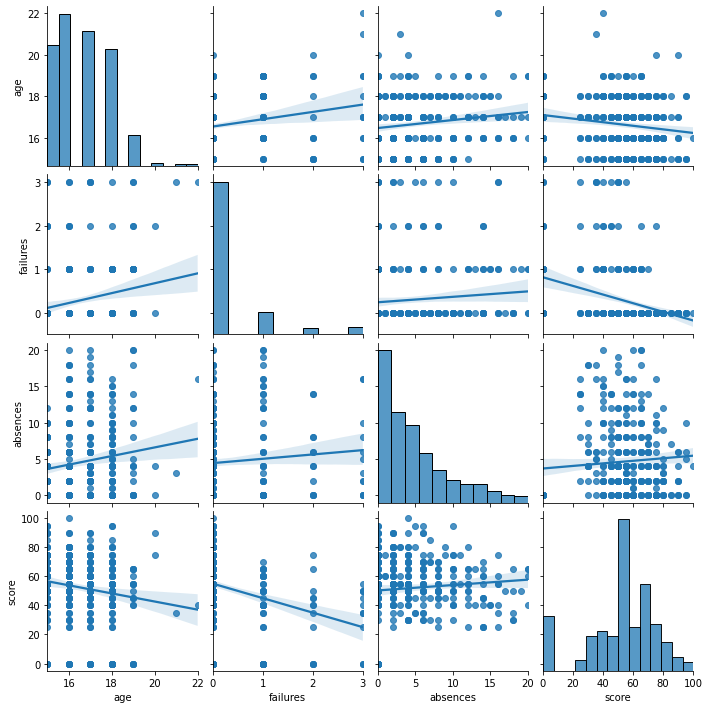

In [829]:
sns.pairplot(stud_math[['age', 'failures', 'absences', 'score']], kind='reg')

## Categorical variables

There are 25 categorical variables: school, sex, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health.

All these columns, with exception of school and sex, have missing values, which we will need to fill in.

#### 1) Address

The more time it takes for a student to get to school, the farther from the city they live. Based on this observation we will fill in the missing values.

In [830]:
stud_math.groupby('traveltime')['address'].agg('value_counts')

traveltime  address
1.0         U          186
            R           31
2.0         U           57
            R           24
3.0         R           12
            U            9
4.0         R            4
            U            3
Name: address, dtype: int64

In [831]:
'''If time spent travelling to school is 30 mins or more (3), 
it is more likely that the student lives outside of the city ('R').'''


def fill_address(x):
    if (pd.isnull(x['address'])) and (pd.notnull(x['traveltime'])):
        if x['traveltime'] >= 3:
            return 'R'
        else:
            return 'U'

    return x['address']

In [832]:
stud_math['address'] = stud_math.apply(fill_address, axis=1)

#### 2) Mother's level of education

Mothers are more likely to have higher education if the family is living in the city.

In [833]:
# Most mothers with 'U' address have higher education (4)
stud_math.groupby('address')['Medu'].agg('value_counts')

address  Medu
R        1.0      21
         2.0      21
         3.0      21
         4.0      15
U        4.0     104
         2.0      73
         3.0      67
         1.0      35
         0.0       3
Name: Medu, dtype: int64

In [834]:
'''If a family lives in the city ('U'), Medu will be filled in with 4 (higher education)'''


def fill_medu(x):
    if pd.isnull(x['Medu']):
        if x['address'] == 'U':
            return 4

    return x['Medu']

In [835]:
stud_math['Medu'] = stud_math.apply(fill_medu, axis=1)

#### 3) Father's level of education

Almost all students' fathers have education, i.e. most of the values are between 1 and 4 (not 0). The number of values in each category is approx. the same, hence we will fill in the missing values with random choise from the range 1 to 4.

In [836]:
stud_math['Fedu'].value_counts()

2.0    99
3.0    86
4.0    80
1.0    76
0.0     2
Name: Fedu, dtype: int64

In [837]:
fedu_list = [1, 2, 3, 4]
null_fedu = stud_math['Fedu'].isnull()  # mask of null values
array_fedu = np.random.choice(fedu_list, size=null_fedu.sum())
stud_math.loc[null_fedu, 'Fedu'] = array_fedu

#### 4) Mother's job, father's job, reason, guardian

These columns have option 'other'. We will fill in missing values in these columns with this option, since it can be anything and should not be erroneously interpreted. 

In [838]:
stud_math.fillna({'Mjob': 'other', 'Fjob': 'other',
                  'reason': 'other', 'guardian': 'other'}, inplace=True)

#### 5) Additional school support

We can see that school MS does not provide additional school support. Hence if school is MS, we can fill in missing values in schoolsup column with 'no'.

In [839]:
stud_math.groupby('school')['schoolsup'].agg('value_counts')

school  schoolsup
GP      no           268
        yes           47
MS      no            42
Name: schoolsup, dtype: int64

In [840]:
'''If school is MS, NaN cells in schoolsup will be filled in with NO'''


def fill_schoolsup(x):
    if pd.isnull(x['schoolsup']):
        if x['school'] == 'MS':
            return 'no'

    return x['schoolsup']

In [841]:
stud_math['schoolsup'] = stud_math.apply(fill_schoolsup, axis=1)

#### 6) Additional family support

If mother's and/or father's level of education is 5-9 years and more, the family provides educational support.

In [842]:
stud_math.groupby('Medu')['famsup'].agg('value_counts')

Medu  famsup
0.0   no         2
1.0   no        28
      yes       24
2.0   yes       50
      no        36
3.0   yes       50
      no        32
4.0   yes       79
      no        29
Name: famsup, dtype: int64

In [843]:
stud_math.groupby('Fedu')['famsup'].agg('value_counts')

Fedu  famsup
0.0   no         1
      yes        1
1.0   no        37
      yes       33
2.0   yes       54
      no        40
3.0   yes       55
      no        31
4.0   yes       61
      no        18
Name: famsup, dtype: int64

In [844]:
'''If mother's and/or father's level of education is 2 and more,
additional family support will be YES'''


def fill_famsup(x):
    if pd.isnull(x['famsup']):
        if x['Fedu'] >= 2 or x['Medu'] >= 2:
            return 'yes'

    return x['famsup']

In [845]:
stud_math['famsup'] = stud_math.apply(fill_famsup, axis=1)

#### 7) Other columns and still missing values

There seems to be no dependency between other columns; columns already mentioned still have some missing values. All now missing values will be filled in with mode. Such approach is acceptable here since missing values in each column are 10% or less.

In [846]:
round((stud_math.isna().sum()/len(stud_math)), 2)  # ratio of missing values

school        0.00
sex           0.00
age           0.00
address       0.01
famsize       0.06
Pstatus       0.10
Medu          0.00
Fedu          0.00
Mjob          0.00
Fjob          0.00
reason        0.00
guardian      0.00
traveltime    0.08
studytime     0.01
failures      0.00
schoolsup     0.02
famsup        0.01
paid          0.10
activities    0.04
nursery       0.04
higher        0.05
internet      0.09
romantic      0.08
famrel        0.07
freetime      0.02
goout         0.02
health        0.04
absences      0.00
score         0.00
dtype: float64

In [847]:
for column in stud_math:
    stud_math[column].fillna(stud_math[column].mode()[0], inplace=True)

### Categorial variables which affect predicted value (score)

Let us check boxplot for categorial variables first. School, family size, father's job, reason for choosing the school, additional family support do not seem to affect exam scors much.

In [848]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

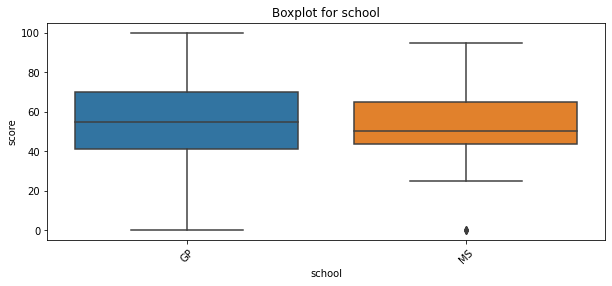

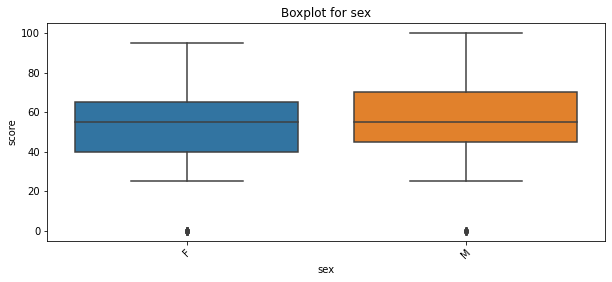

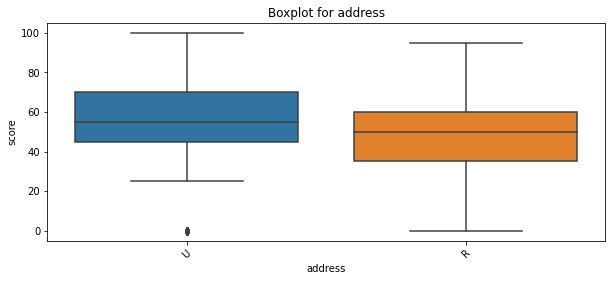

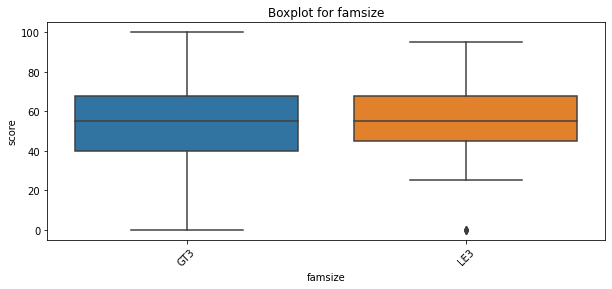

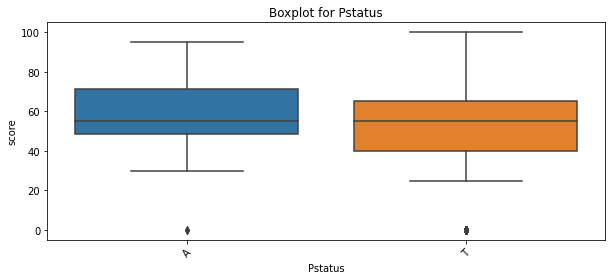

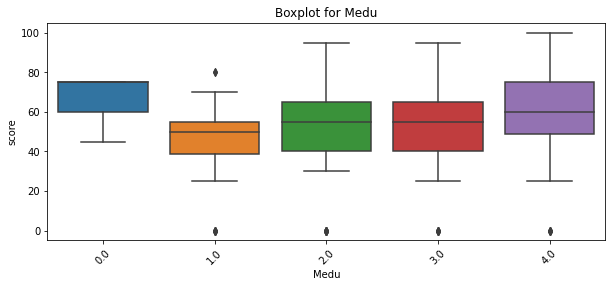

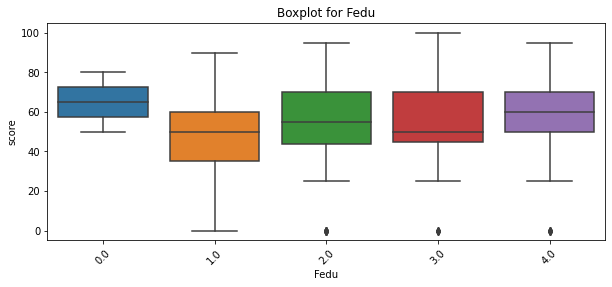

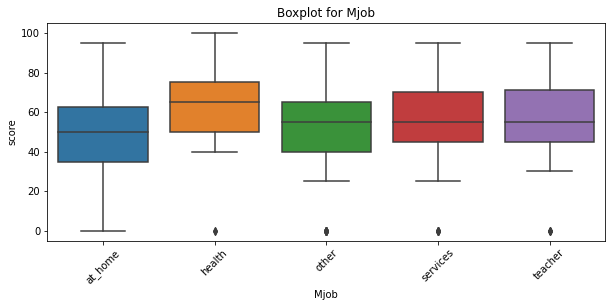

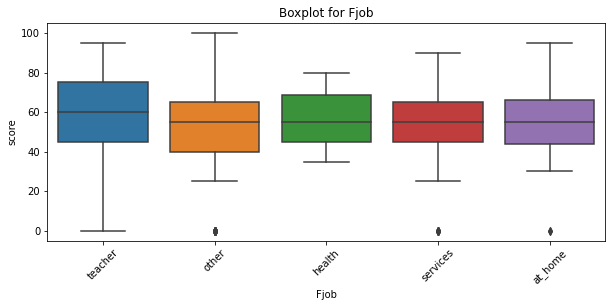

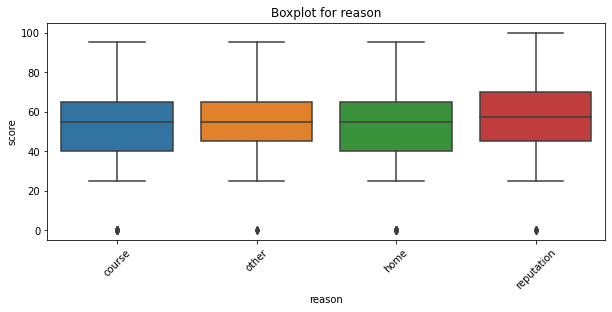

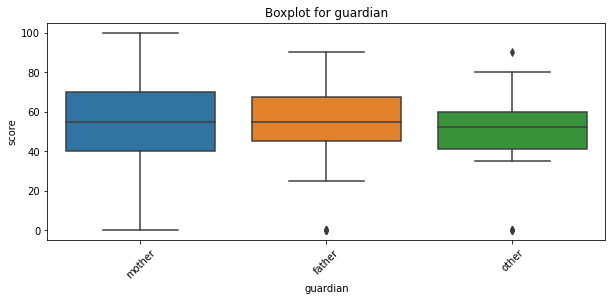

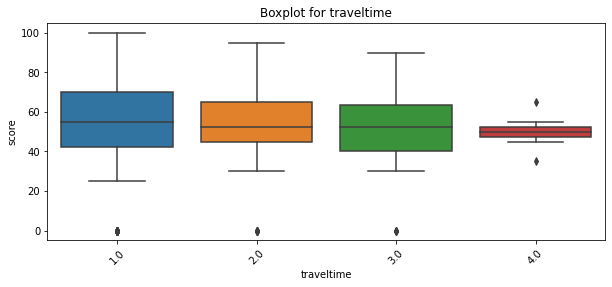

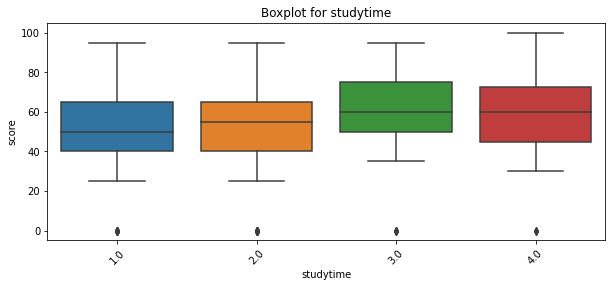

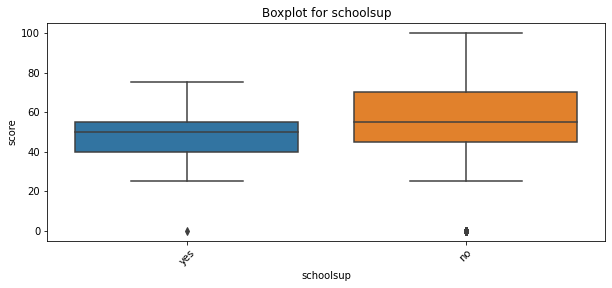

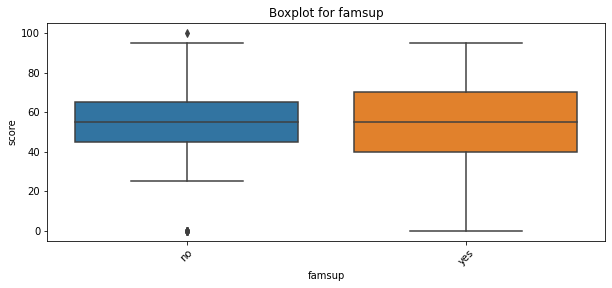

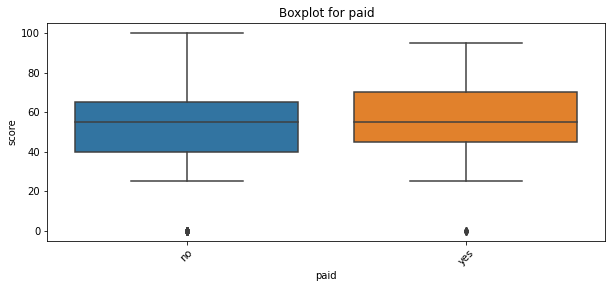

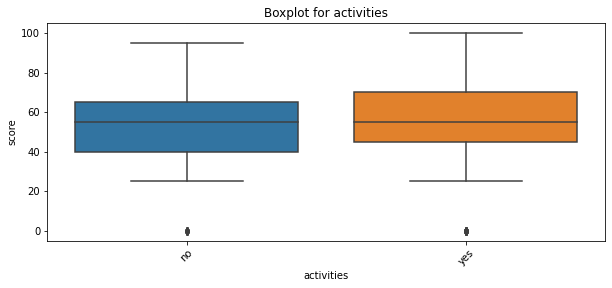

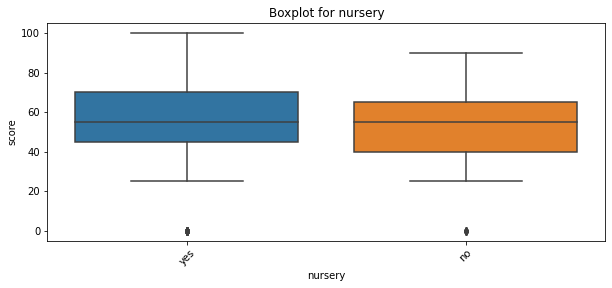

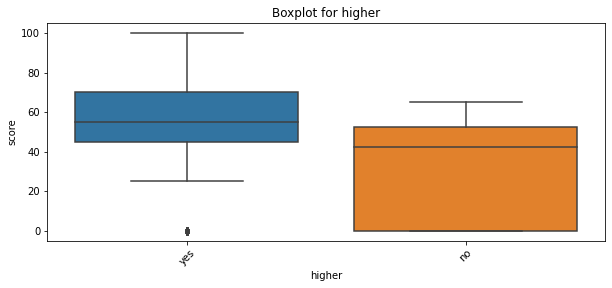

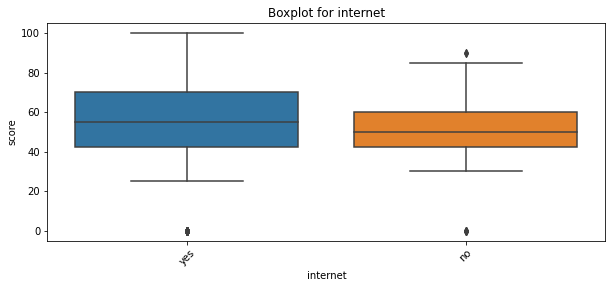

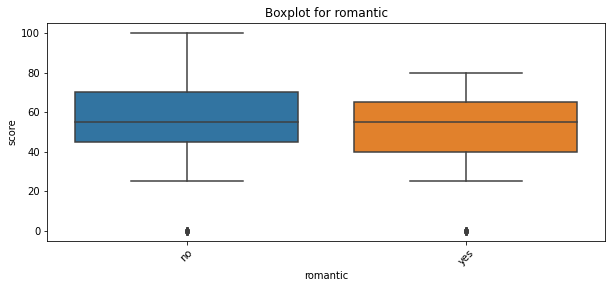

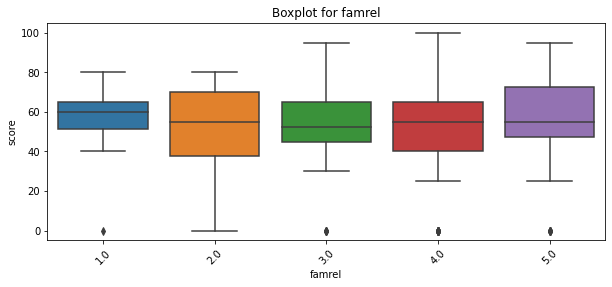

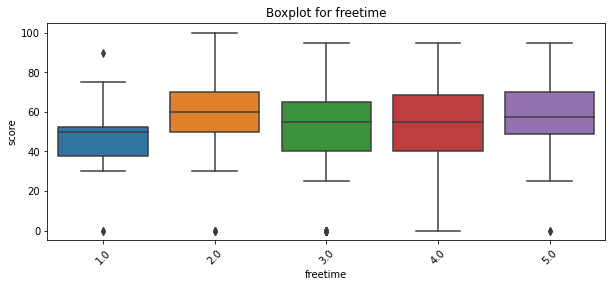

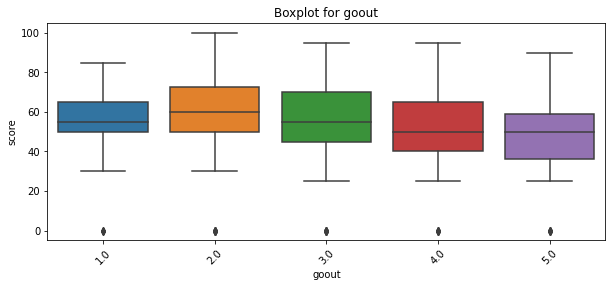

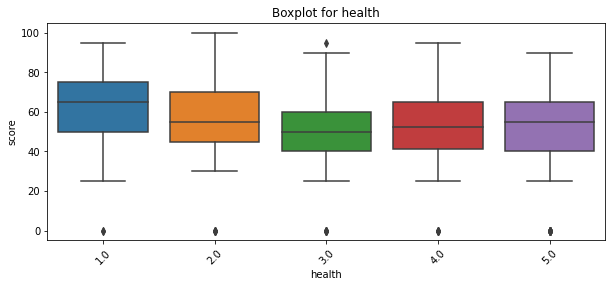

In [849]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

However let us check the dependency with Student's test. It shows us that statistically significant difference can be found for the columns with sex, address, mother's level of education, mother's job, additional paid math courses, whether a student wants to have higher education, whether a student is in a romantic relationship.

In [850]:
def get_stat_dif(column):
    # maximum is 5, so we will not limit indices
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Statistically significant difference is found for the column', column)
            break

In [851]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
            'activities', 'nursery', 'higher', 'internet', 'romantic',
            'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Statistically significant difference is found for the column sex
Statistically significant difference is found for the column address
Statistically significant difference is found for the column Medu
Statistically significant difference is found for the column Mjob
Statistically significant difference is found for the column paid
Statistically significant difference is found for the column higher
Statistically significant difference is found for the column romantic


Previously we found positive correlation between number of classes missed and exam score. Let us check whether attending additional paid math courses. We can see that additional courses mostly helped only those who got the highest scores (90 and more).

Text(0.5, 1.0, 'Additional paid math courses')

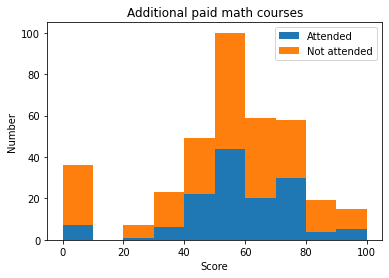

In [852]:
stacked_hist = pd.DataFrame({'Attended': stud_math.groupby('paid').get_group('yes').score,
                             'Not attended':   stud_math.groupby('paid').get_group('no').score}
                            ).plot.hist(stacked=True)

stacked_hist.set_xlabel('Score')
stacked_hist.set_ylabel('Number')
stacked_hist.set_title('Additional paid math courses')

## The Model

For model dataset we will keep all numerical variables and those categorical variables that showed statistically significant difference.

In [853]:
stud_math_for_model = stud_math.loc[:, ['age', 'failures', 'absences',
                                        'sex', 'address', 'Medu', 'Mjob', 'paid', 'higher', 'romantic', 'score']]
stud_math_for_model.head()

,age,failures,absences,sex,address,Medu,Mjob,paid,higher,romantic,score
0,18,0.0,6.0,F,U,4.0,at_home,no,yes,no,30.0
1,17,0.0,4.0,F,U,1.0,at_home,no,yes,no,30.0
2,15,3.0,10.0,F,U,1.0,at_home,no,yes,no,50.0
3,15,0.0,2.0,F,U,4.0,health,yes,yes,yes,75.0
4,16,0.0,4.0,F,U,3.0,other,yes,yes,no,50.0


## Conclusion

1. There are few missing values (10% or less for different columns).
2. There are outliers in all numeric columns except for age, which is expected though for all other columns except for abcenses. We can conclude that the data is clean enough.
3. Almost 10% of students have exam score 0. This can be interpreted that some or all of these 10% do not take math exam at all.
4. Father's job and education do not affect scores, while mother's ones do. That can mean that mothers are more engaged with their children's education.
5. There is a weak positive correlation between number of classes missed and exam score. At the same time more of those who got the score of 90 and more attended additional paid math courses. This can be interpreted as that some students may prefer extracurricular math courses to going to school if they are aimed to get the highest scores.
6. Variables proposed to be used in futher analysis: age, failures, absences, sex, address, Medu, Mjob, paid, higher, romantic, score.